In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [9]:
X_test

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
433,17.000000,7.1250
773,29.699118,7.2250
25,38.000000,31.3875
84,17.000000,10.5000


In [10]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [11]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

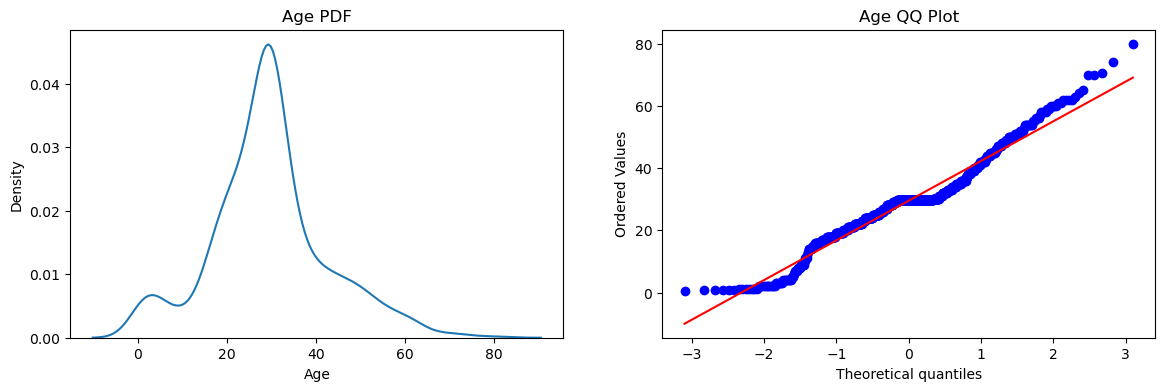

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

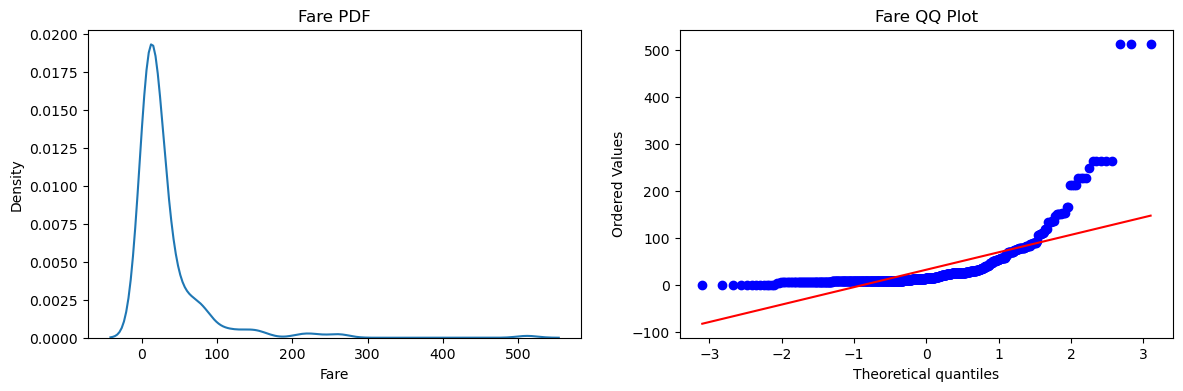

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = "norm", plot = plt)
plt.title('Fare QQ Plot')

plt.show()

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [16]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [17]:
print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [18]:
trf = FunctionTransformer(func = np.log1p)

In [19]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

In [27]:
print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.659217877094972


In [32]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring = 'accuracy', cv = 10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring = 'accuracy', cv = 10)))


LR 0.678027465667915
DT 0.6532459425717854


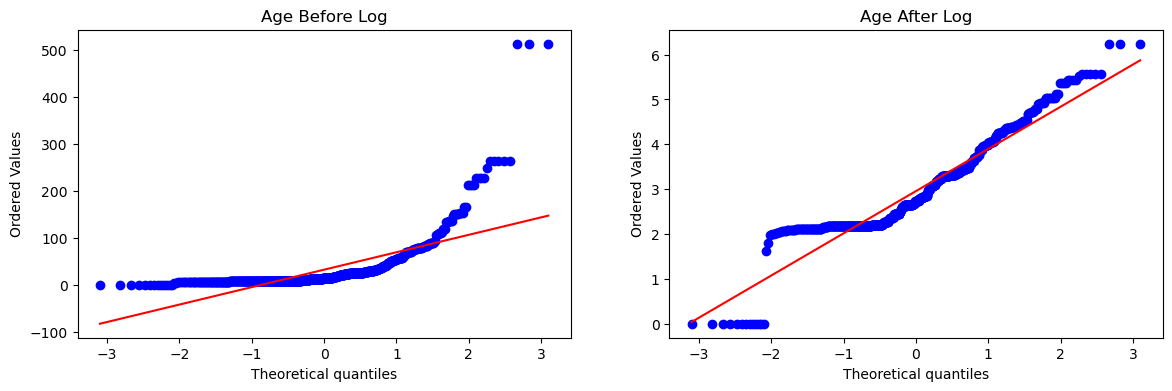

In [34]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist = "norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = "norm", plot = plt)
plt.title('Fare After Log')

plt.show()

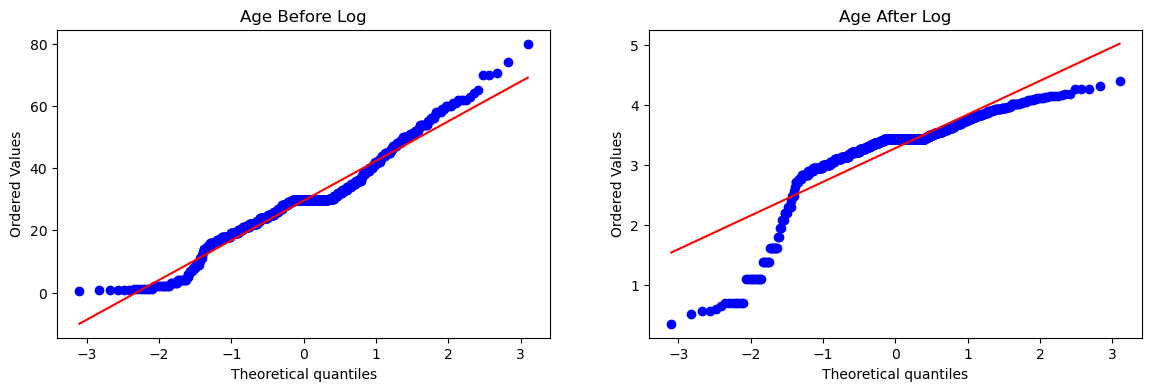

In [35]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist = "norm", plot = plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot = plt)
plt.title('Age After Log')

plt.show()

In [36]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [37]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [40]:
clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

In [41]:
print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [42]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv = 10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed2 , y, scoring = 'accuracy', cv = 10)))

LR 0.6712609238451936
DT 0.6577153558052434


In [45]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder = 'passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv = 10)))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(X['Fare'], dist = "norm", plot=plt)
    plt.title('Fare Before Transform')
    
    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist = "norm", plot=plt)
    plt.title("Fare After Trasnform")
    
    plt.show()

Accuracy 0.6442446941323345


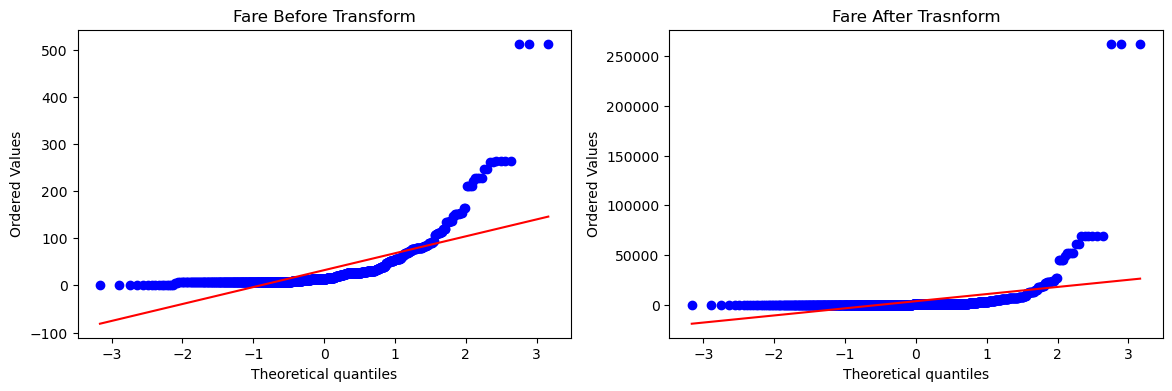

In [47]:
apply_transform(lambda x: x**2)

Accuracy 0.39843945068664166


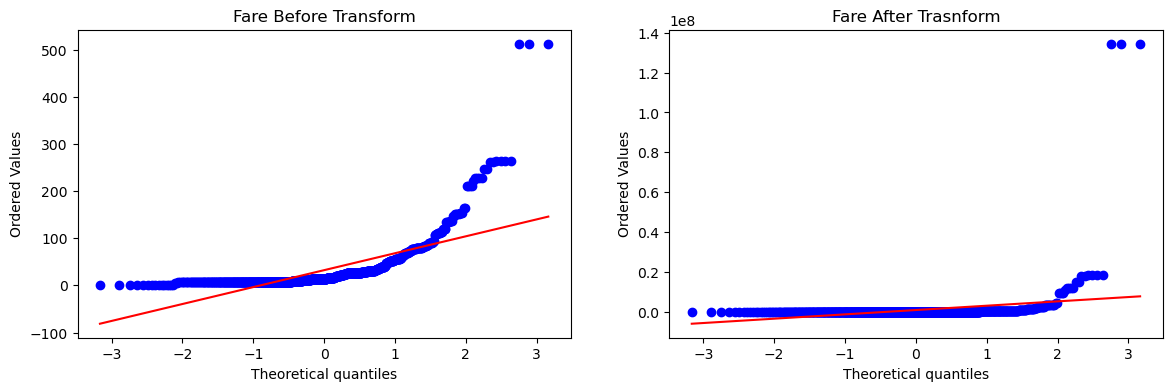

In [48]:
apply_transform(lambda x: x**3)

Accuracy 0.6589013732833957


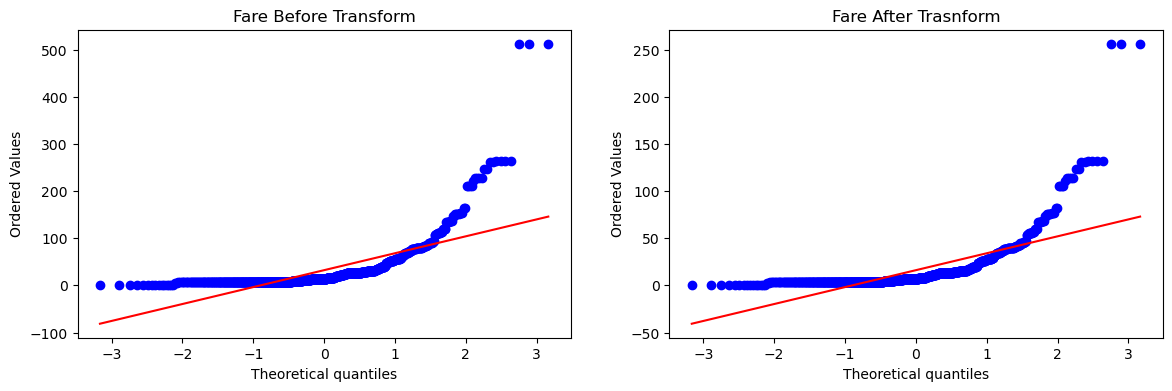

In [50]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


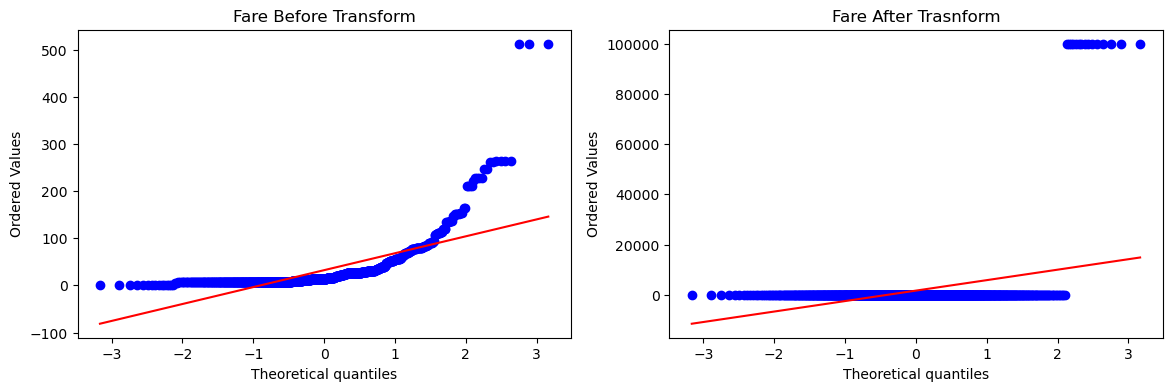

In [51]:
apply_transform(lambda x: 1/(x+0.00001))

Accuracy 0.6195131086142323


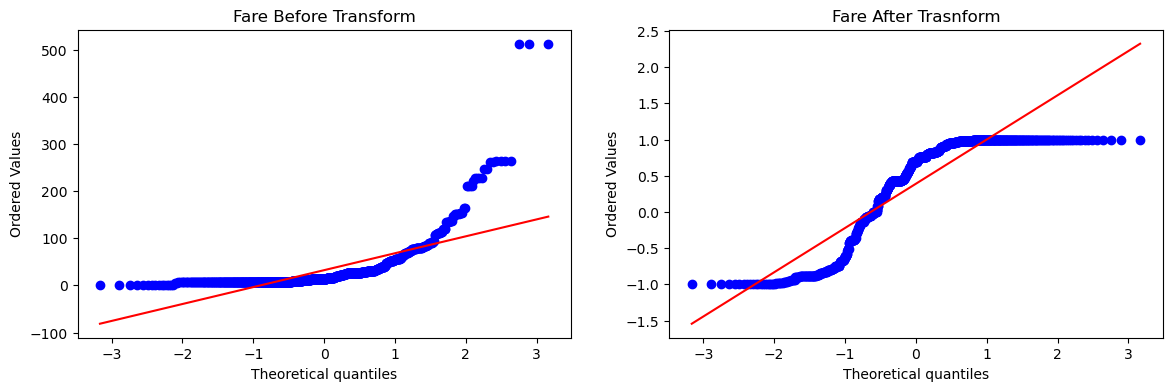

In [52]:
apply_transform(np.sin)